<h2>Load data</h2>

In [1]:
from numpy import loadtxt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# load data
import pandas as pd
df = pd.read_csv('data/diabetes.csv')
np_data = df.values

# split data into X and y
X_raw = np_data[:,0:-1]
# Convert class label strings to integers
Y_raw = np_data[:,-1]
encoder = LabelEncoder()
encoder.fit(Y_raw)
Y = encoder.transform(Y_raw)

# set seed to randomizer
seed = 7

# shuffle data
X_raw, Y = shuffle(X_raw, Y, random_state=0)

print("Attributes: {}".format(X_raw.shape[1]))
print("Examples: {}".format(X_raw.shape[0]))

Attributes: 8
Examples: 768


<h2>Function for evaluating model accuracy</h2>

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

def evaluate(model):
    print("-- Training data --")
    # train model on training dataset
    model.fit(X, Y)
    # evaluate dataset
    y_pred = model.predict(X)
    # calculate accuracy
    accuracy = accuracy_score(Y, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)
    
    print("")
    print("-- 10-fold CV --")
    # 10-fold CV
    y_pred = cross_val_predict(model, X, Y, cv=10)
    # calculate accuracy
    accuracy = accuracy_score(Y, y_pred)
    print("Average accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)

<h2>Dimensionality Reduction</h2>
Using Principal Component Analysis (PCA) to reduce from 4 to 2 attributes.

In [3]:
from sklearn.decomposition import PCA

print("Original attributes: {}".format(X_raw.shape[1]))
dr = PCA(n_components=4)
dr.fit(X_raw)
X = dr.transform(X_raw)
print("Attributes after reduction: {}".format(X.shape[1]))

# Show min, max and range of attributes
attr_min = X.min(0)
attr_max = X.max(0)
attr_range = attr_max - attr_min
print("Min value: {}".format(attr_min))
print("Max value: {}".format(attr_max))
print("Value range: {}".format(attr_range))

Original attributes: 8
Attributes after reduction: 4
Min value: [-91.50338786 -86.24860793 -50.13875903 -45.47223828]
Max value: [767.47406204 114.93061601  77.41257799  75.4618994 ]
Value range: [858.9774499  201.17922394 127.55133702 120.93413768]


<h2>Linear classifier</h2>

In [4]:
from sklearn import linear_model

# train model
model = linear_model.SGDClassifier(max_iter=2000, random_state=seed)
evaluate(model)

-- Training data --
Accuracy: 61.33%
Confusion Matrix:
[[354 146]
 [151 117]]

-- 10-fold CV --
Average accuracy: 68.75%
Confusion Matrix:
[[393 107]
 [133 135]]


<h2>Neural Network classifier</h2>

In [17]:
from sklearn.neural_network import MLPClassifier

# train model
model = MLPClassifier(max_iter=2000, random_state=seed, solver='lbfgs')
evaluate(model)

-- Training data --
Accuracy: 90.10%
Confusion Matrix:
[[474  26]
 [ 50 218]]

-- 10-fold CV --
Average accuracy: 63.67%
Confusion Matrix:
[[362 138]
 [141 127]]


<h2>Decision Tree classifier</h2>

In [6]:
from sklearn.tree import DecisionTreeClassifier

# train model
model = DecisionTreeClassifier(random_state=seed)
evaluate(model)

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[500   0]
 [  0 268]]

-- 10-fold CV --
Average accuracy: 64.45%
Confusion Matrix:
[[356 144]
 [129 139]]


<h2>SVM classifier</h2>

In [22]:
from sklearn import svm

# train model
model = svm.SVC(random_state=seed, C=120)
evaluate(model)

-- Training data --
Accuracy: 100.00%
Confusion Matrix:
[[500   0]
 [  0 268]]

-- 10-fold CV --
Average accuracy: 64.58%
Confusion Matrix:
[[493   7]
 [265   3]]


<h2>kNN classifier</h2>

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# train model
model = KNeighborsClassifier(n_neighbors=3)
evaluate(model)

-- Training data --
Accuracy: 83.85%
Confusion Matrix:
[[453  47]
 [ 77 191]]

-- 10-fold CV --
Average accuracy: 66.93%
Confusion Matrix:
[[386 114]
 [140 128]]


<h2>XGBoost classifier</h2>

In [15]:
from xgboost import XGBClassifier
# Ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# train model
model = XGBClassifier(random_state=seed)
evaluate(model)

-- Training data --
Accuracy: 85.03%
Confusion Matrix:
[[469  31]
 [ 84 184]]

-- 10-fold CV --
Average accuracy: 72.66%
Confusion Matrix:
[[422  78]
 [132 136]]


<h2>Plot attributes</h2>

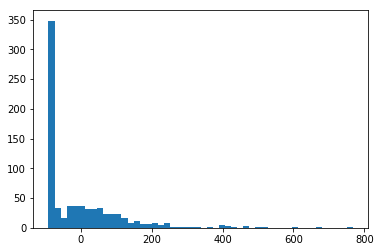

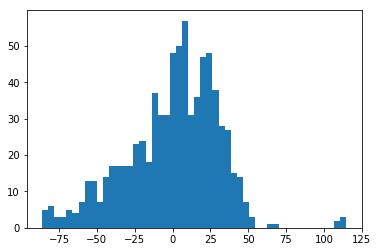

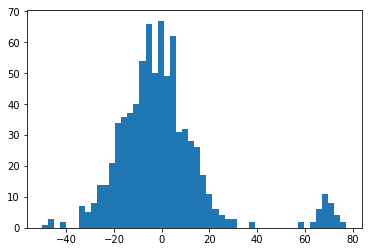

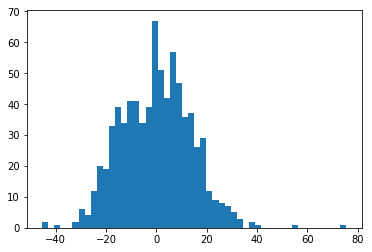

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(X[:,0], bins=50)
plt.show()
plt.hist(X[:,1], bins=50)
plt.show()
plt.hist(X[:,2], bins=50)
plt.show()
plt.hist(X[:,3], bins=50)
plt.show()